# Perceptron

O Perceptron é um dos mais antigos modelos de aprendizado de maquina. Ele foi desenvolvido nas décadas de 1950 e 1960 por Frank Rosenblatt. Esse modelo é útil para resolver problemas de classificação binária linearmente separáveis.
Sendo assim, para a satisfatória utilização do Perceptron, seus dados devem ser separados em entradas e suas respectivas saídas, essas que devem se limitar a duas classificações, e deve haver uma maneira de separar esses dados linearmente.

O modelo se baseia em organizar os dados em um vetor $ x $ para suas entradas e um vetor $ y $ para suas respectivas saídas. E então, idealizar um vetor $ w $, de mesma dimensão que cada um dos dados de entrada, que seria responsável por estabelecer pesos para cada um dos dados de entrada, revelando sua importância para a decisão, ou classificação final correta.
Com esse vetor $ w $ ideal, realizaria-se um produto interno entre ele e o vetor $ x $ e revelaria qual a classificação correta, por exemplo:

Classificar como sim se $ \sum \limits _{i=1} ^{d} w_i x_i > constante $

Classificar como não se $ \sum \limits _{i=1} ^{d} w_i x_i < constante $

Ou, compactamente, assumindo um $ h(x) $ como uma função que da como resultado +1 se sim e -1 se não:

$h(x) = sign((\sum \limits _{i=1} ^{d} w_i x_i) + b)$,

onde o $ b $ é o chamado "bias", ou o limiar em relação a que consideramos uma classificação ou outra. Percebe-se que tanto os valores de $ w $ quanto de $ b $ são relativos, e pode haver mais de um conjunto deles que separa corretamente os dados linearmente.

O alguns algoritmos então surgem para tentar, apenas tendo dados de entrada e saída, aproximar um vetor $ w $ que sirva para resolver o problema da maneira mais próxima da correta possível. Um algoritmo possível será implementado a seguir, ele se baseia em dados de entrada com duas dimensões, e que são completamente separáveis por uma reta.

Esse algoritmo se baseia em inicializar o vetor $ w $ com valores aleatórios, realizar o produto interno: $ h(x) = \langle w, x \rangle$ e, em seguida, procurar algum dado que esteja classificado de uma maneira errônea, caso haja, o valor de $ w $ é atualizado de uma determinada maneira, e o processo se repete até que todos os pontos estejam classificados corretamente.

Se os dados forem linearmente separáveis, e a atualização do vetor $ w $ ocorrer da maneira a seguir: $ w(t + 1) = w(t) + y(t)x(t)$ é possível mostrar que o algoritmo converge para que todos os pontos estejam separados corretamente.

Algoritmo:

1) Inicializa $ w $ com valores aleatóriamente escolhidos

2) Verifica se há algum dado classificado errado

3) Se há algum dado classificado errado, atualiza $ w(t + 1) = w(t) + y(t)x(t)$ e volta para 2)

4) Fim.





# Definições do algoritmo

In [12]:
import numpy as np 
import matplotlib.pyplot as plt
IT_LIMIT = 100000# Limite de iterações
def esbocar(w, b, x, y, i):
    pbx = np.max(x[:,0])
    pby = np.max(x[:,1])
    psx = np.min(x[:,0])
    psy = np.min(x[:,1])
    plt.figure(i)
    plt.scatter(x[:,0],x[:,1],c=y)
    u = np.linspace(psx - 1, pbx + 1, 1000)
    v = -1 * (w[0] * u + b)/w[1]
    plt.plot(u,v)
    plt.grid(True)
    plt.xlim(psx - 1, pbx + 1)
    plt.ylim(psy - 1, pby + 1)
    plt.xlabel('x axis')
    plt.ylabel('y axis')
    plt.title("Reta de separacao")
    
def percepetron(x, y, b, wi):
    it = 0 #número de iterações = 0
    w = wi #inicializando com valores aleatórios
    wb = w
    erros = 1
    merros = float("inf")
    esbocar(w, b, x, y, 0)
    while (erros and it < IT_LIMIT):  #Enquanto o Algoritmo encontrar pontos classificados erroneamente, ele continua a rodar, a menos que o número de iterações passe o limite
        erros = 0;
        for i in range(len(x[:,0])):
            s = w.dot(x[i,:])
            #s = w[0]*x[i][0] + w[1]*x[i][1] # s é o resultado do produto interno do vetor w pelo vetor x
            if ( s + b >= 0): # Analiza a classificação
                h = 1;
            else:
                h = -1;
            if (h * y[i] < 0):
                w = w + y[i]*x[i]
                #w[0] = w[0] + x[i][0] * y[i] # Atualização do vetor w
                #w[1] = w[1] + x[i][1] * y[i]
                erros += 1;
        it += 1
        if erros <= merros:
            wb = w
            merros = erros
        if (it >= IT_LIMIT):
            input("A reta não foi encontrada após 100000 iterações")
    esbocar(w, b, x, y, it)
    return wb, it   


def predict(x, w, b):
    s = w.dot(x)
    if (s + b >= 0):
        h = 1;
        print("O ponto recebido é amarelo")
    else:
        h = -1
        print("O ponto recebido é azul")
    return h


# Teste 1

Para testar nosso algoritmo perceptron, podemos criar um conjunto de dados linearmente separáveis, que serão divididos entre "azuis" e "amarelos. Assim podemos visualizar como através das iterações, a nossa reta definida pelo vetor $ w $ e pelo "bias" se aproxima melhor de uma reta que separa os dados corretamente.

Pontos "Azuis" : $ (1 , 2.5); (0.5, 0.5); (2, 2) $

Pontos "Amarelos : $ (6, 4); (8, 2); (6,2) $

Utilizando: $ b = 1 $ e $ w_i = (0.2, 1)  $

A equacao da reta final é:  6.199999999999999 * x +  -8.5 * y + 1  = 0   encontrado em  12 iteracoes


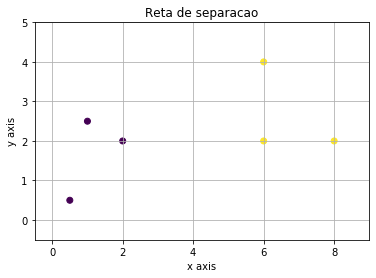

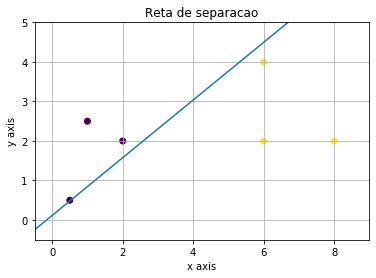

In [13]:
#xis = np.array([[1, 2.5], [0.5, 0.5], [2, 2], [4, 0.1], [0.1, 5] , [6,4], [8,2], [6,2], [5, 5], [3, 7], [7, 6], [8, 5]])
#yi = [-1 , -1, -1, -1 , -1 , 1, 1, 1, 1, 1, 1, 1]
x = np.array([[1, 2.5], [0.5, 0.5], [2, 2], [6,4], [8,2], [6,2]])
y = np.array([-1 , -1, -1, 1, 1, 1])
b = 1
wi = np.array([0.2, 1])
[w, it] = percepetron(x, y, b, wi)

print("A equacao da reta final é: ", w[0],"* x + ", w[1],"* y +", b," = 0   encontrado em ", it, "iteracoes")


# Previsão

Depois que conseguimos uma Reta de separação satisfatória, algo interessante a se fazer é tentar "prever" qual cor seria de um novo ponto.

Chutando 3 pontos:
$A = (0, 0)$
$B = (2, 1)$
$C = (2, 2)$

In [10]:
pa = [0,0]
pb = [2,1]
pc =[2,2]
predict(pa, w, b)
predict(pb, w, b)
predict(pc, w, b);


O ponto recebido é amarelo
O ponto recebido é amarelo
O ponto recebido é azul


# Teste 2

Pontos "Azuis" : $ (1 , 2.5); (0.5, 0.5); (2, 2) (4, 0.1); (0.1,5) $

Pontos "Amarelos : $ (6, 4); (8, 2); (6,2) ; (5,5); (3, 7); (7,6); (8,5) $



A reta não foi encontrada após 100000 iteraçõess
A equacao da reta final é:  3.2 * x +  1.7000000000136595 * y + 1  = 0   encontrado em  100000 iteracoes


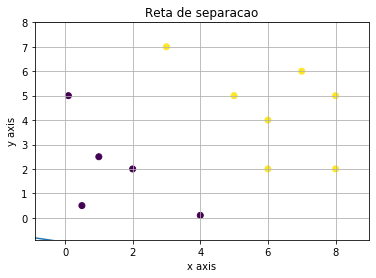

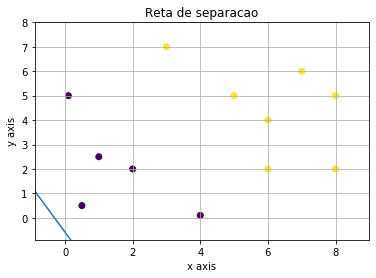

In [3]:
x2 = np.array([[1, 2.5], [0.5, 0.5], [2, 2], [4, 0.1], [0.1, 5] , [6,4], [8,2], [6,2], [5, 5], [3, 7], [7, 6], [8, 5]])
y2 = [-1 , -1, -1, -1 , -1 , 1, 1, 1, 1, 1, 1, 1]

b = 1
wi = [0.2, 1]
[w, it] = percepetron(x2, y2, b, wi)

print("A equacao da reta final é: ", w[0],"* x + ", w[1],"* y +", b," = 0   encontrado em ", it, "iteracoes")

# Análise

Após alguns testes, é possível afirmar que esse algoritmo é extremamente limitado. Apesar de funcionar bem para uma quantidade de pontos pequena, se a quantidade de pontos for maior que 6, e o conjunto vetor $ w_i $ e "bias" iniciais gerarem uma reta muito distante da ideal, o número de iterações já passa do limite estabelecido.

Com isso estabelecido, uma sugestão de melhoria para o algoritmo seria um fator que calcula o erro de cada ponto, que poderia entrar no calculo da atualização com o objetivo de fazer com  cada atualização aproxime mais a reta atual da reta procurada.

In [5]:
x

array([[1. , 2.5],
       [0.5, 0.5],
       [2. , 2. ],
       [6. , 4. ],
       [8. , 2. ],
       [6. , 2. ]])